In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\user'

In [4]:
df=pd.read_csv("C:/Users/user/Desktop/New folder (4)/Ecommerce.csv",encoding="ISO-8859-1")

In [4]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12-09-2011 12:50,4.95,12680.0,France


In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
# change the column names
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [5]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [9]:
df.shape

(541909, 8)

In [10]:
df.describe().round(2)

,quantity,unit_price,cust_id
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


# Perform Basic EDA

<AxesSubplot:>

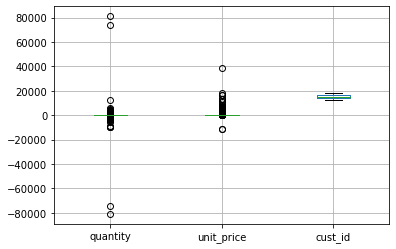

In [12]:
df.boxplot()

array([[<AxesSubplot:title={'center':'quantity'}>,
        <AxesSubplot:title={'center':'unit_price'}>],
       [<AxesSubplot:title={'center':'cust_id'}>, <AxesSubplot:>]],
      dtype=object)

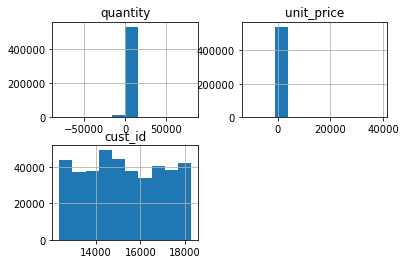

In [13]:
df.hist()

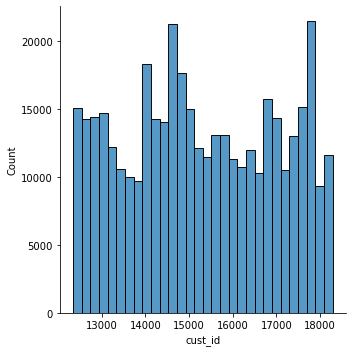

In [14]:
sns.displot(df, x ="cust_id",bins=30)

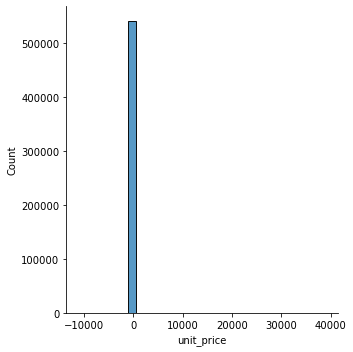

In [15]:
sns.displot(df, x ="unit_price",bins=30)

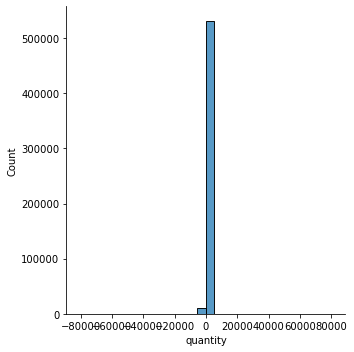

In [16]:
sns.displot(df, x ="quantity",bins=30)

In [17]:
df.aggregate({"cust_id":['sum', 'min'], 
              "unit_price":['max', 'min'], 
              "quantity":['min', 'sum']}) 

,cust_id,unit_price,quantity
max,NaN,38970.00,NaN
min,1.234600e+04,-11062.06,-80995.0
sum,6.219476e+09,NaN,5176450.0


In [18]:
df.nunique()

invoice_num     25900
stock_code       4070
description      4223
quantity          722
invoice_date    23260
unit_price       1630
cust_id          4372
country            38
dtype: int64

In [19]:
duplicate = df[df.duplicated()]
print(duplicate)
print(duplicate.count())

       invoice_num stock_code                        description  quantity  \
517         536409      21866        UNION JACK FLAG LUGGAGE TAG         1   
527         536409      22866      HAND WARMER SCOTTY DOG DESIGN         1   
537         536409      22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539         536409      22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555         536412      22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...            ...        ...                                ...       ...   
541675      581538      22068        BLACK PIRATE TREASURE CHEST         1   
541689      581538      23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692      581538      22992             REVOLVER WOODEN RULER          1   
541699      581538      22694                       WICKER STAR          1   
541701      581538      23343       JUMBO BAG VINTAGE CHRISTMAS          1   

            invoice_date  unit_price  cust_id         country  

<AxesSubplot:>

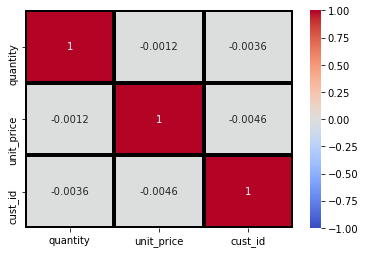

In [20]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')




In [21]:
df.head()


,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


<AxesSubplot:xlabel='quantity', ylabel='country'>

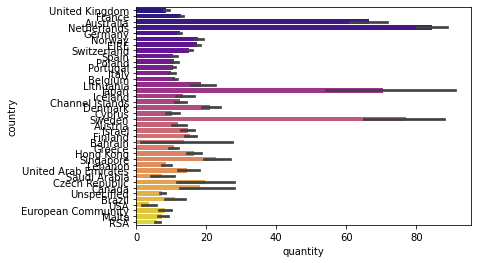

In [22]:
sns.barplot(x ='quantity', y ='country',data = df,  
            palette ='plasma')

<AxesSubplot:xlabel='unit_price', ylabel='country'>

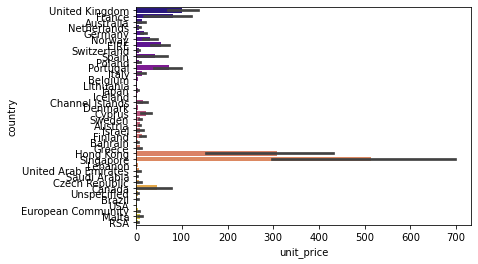

In [23]:
sns.barplot(x ='unit_price', y ='country', data = df,  
            palette ='plasma', estimator = np.std) 

<AxesSubplot:xlabel='cust_id', ylabel='country'>

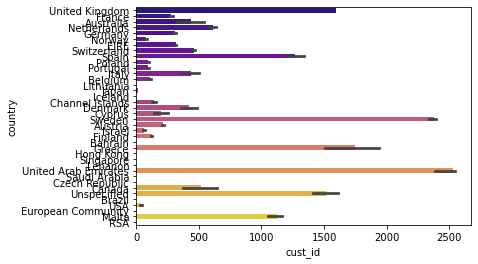

In [24]:
sns.barplot(x ='cust_id', y ='country', data = df,  
            palette ='plasma', estimator = np.std) 

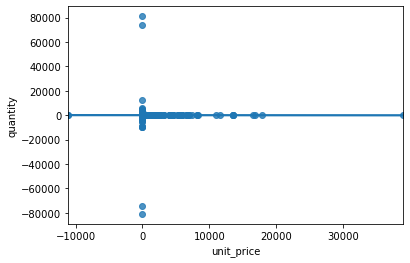

In [25]:
sns.regplot(x="unit_price", y="quantity", data=df);

In [ ]:
sns.pairplot(df)

In [5]:
#Checking missing or null values
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [5]:
df_new=df.dropna()

In [8]:
df_new.isnull().sum().sort_values(ascending=False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [11]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [12]:
 df_new.drop_duplicates(subset=None, keep=False, inplace=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


# Remove rows which have negative values in Quantity column

In [8]:
df_new=df_new[df_new['Quantity']>0]

In [9]:
df_new.describe().round()

,Quantity,UnitPrice,CustomerID
count,397924.0,397924.0,397924.0
mean,13.0,3.0,15294.0
std,180.0,22.0,1713.0
min,1.0,0.0,12346.0
25%,2.0,1.0,13969.0
50%,6.0,2.0,15159.0
75%,12.0,4.0,16795.0
max,80995.0,8143.0,18287.0


In [12]:
# change the column names
df_new.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [13]:
# change the invoice_date format - String to Timestamp format
df_new['invoice_date'] = pd.to_datetime(df_new.invoice_date)
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


###Add the columns - Month, Day and Hour for the invoice

In [29]:
df_new.insert(loc=2,column='Month',value=df_new.invoice_date.dt.month)


In [26]:
df_new.insert(loc=3,column='Day',value=(df_new.invoice_date.dt.dayofweek)+1)


In [30]:
df_new.insert(loc=4,column='Hour',value=df_new.invoice_date.dt.hour)
              

In [17]:
df_new.head()

,invoice_num,stock_code,Month,Day,Hour,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


In [19]:
df_new['amount_spent'] = df_new['quantity'] * df_new['unit_price']

In [20]:
df_new = df_new[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]

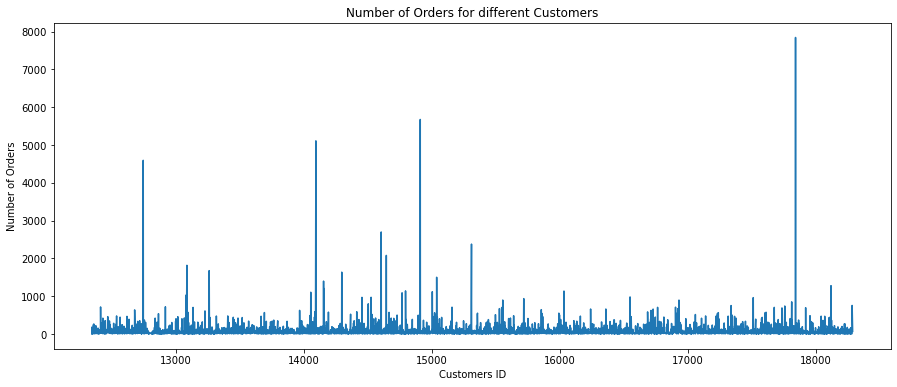

In [21]:
orders = df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders.cust_id, orders.invoice_num)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()




In [22]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='invoice_num', ascending=False).head()

The TOP 5 customers with most number of orders...


,cust_id,country,invoice_num
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


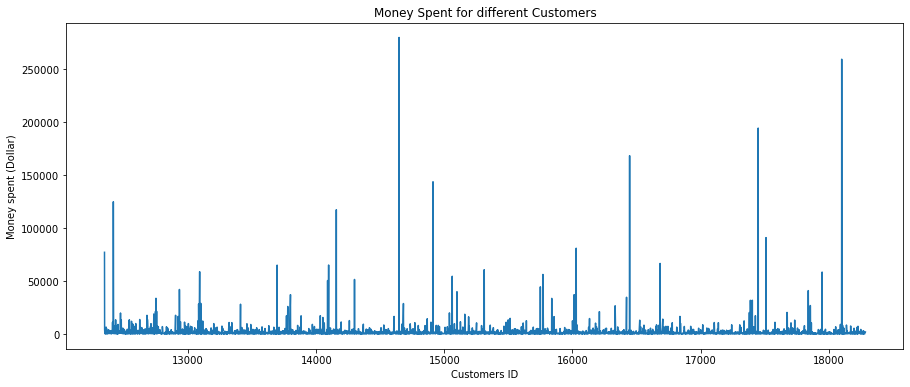

In [23]:
money_spent = df_new.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.cust_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [24]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,cust_id,country,amount_spent
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06


In [27]:
df_new.groupby('invoice_num')['Day'].unique().value_counts().sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: Day, dtype: int64

In [31]:
df_new.groupby('invoice_num')['Month'].unique().value_counts().sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1]      987
[2]      998
[3]     1321
[4]     1149
[5]     1555
[6]     1393
[7]     1331
[8]     1281
[9]     1756
[10]    1929
[11]    2658
[12]    2178
Name: Month, dtype: int64

In [32]:
df_new.groupby('invoice_num')['Hour'].unique().value_counts().iloc[:-1].sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[6]        1
[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: Hour, dtype: int64

NameError: name 'color' is not defined

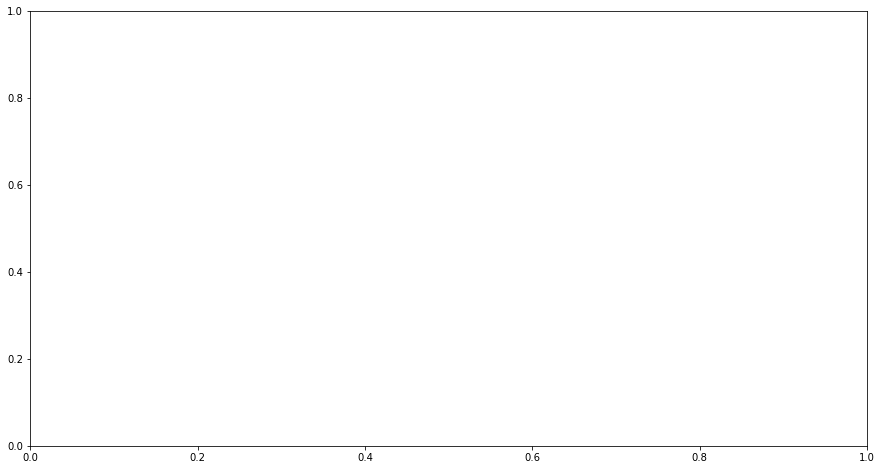

In [37]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values()
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

In [38]:
ax = df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

KeyError: 'Column not found: year_month'

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.

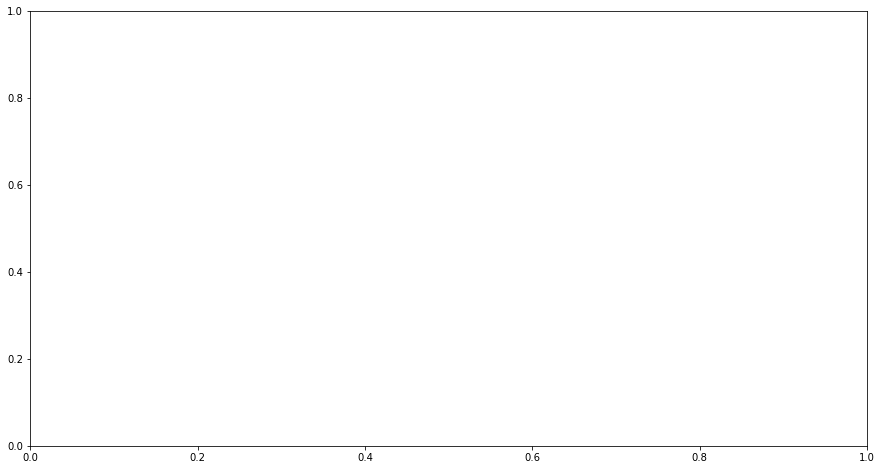

In [41]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()